## Data Preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv('Alcohol-Related_Disease_Impact__ARDI__Application_-_Alcohol-Attributable_Deaths_20240217.csv')
ardi_data.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource ConditionType  \
0       2015     2019           WV  West Virginia       ARDI       Chronic   
1       2015     2019           WV  West Virginia       ARDI         Total   
2       2015     2019           US  United States       ARDI         Acute   
3       2015     2019           US  United States       ARDI         Acute   
4       2015     2019           WV  West Virginia       ARDI         Acute   

                     Category        Cause_of_Death  \
0                       Total  Total for All Causes   
1                       Total  Total for All Causes   
2  Alcohol-Related Poisonings     Alcohol poisoning   
3  Alcohol-Related Poisonings     Alcohol poisoning   
4                       Total  Total for All Causes   

               Data_Value_Unit  Data_Value_Type  ... ConditionTypeID  \
0  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
1  Alcohol-attributable deaths  5 years average  ...          EXCSVE   
2  Alcohol-attributable deaths  5 years average  ...           ACUTE   
3  Alcohol-attributable deaths  5 years average  ...           ACUTE   
4  Alcohol-attributable deaths  5 years average  ...          ANYALC   

   CategoryID Cause_of_DeathID EffectID ConsumptionID SexID AgeCategoryID  \
0         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
1         TOT           TOTALL  HARMEFF        EXCSVE  GENF          UN21   
2        CAT6           ALCPOI  HARMEFF        EXCSVE  GENF          UN21   
3        CAT6           ALCPOI  HARMEFF        EXCSVE  GENM           OTH   
4         TOT           TOTALL  HARMEFF        ANYALC  GENM           OTH   

  AgeGroupID DataValueTypeID  DataValueUnitId  
0       Age0             AAD        5YEARSAVG  
1       Age0             AAD        5YEARSAVG  
2      Age21             AAD        5YEARSAVG  
3       Age0             AAD        5YEARSAVG  
4       Age0             AAD        5YEARSAVG  

[5 rows x 30 columns]

In [3]:
ardi_data.shape

(62504, 30)

In [4]:
missing_values = ardi_data.isnull().sum()

missing_values

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
ConditionType                     0
Category                          0
Cause_of_Death                    0
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      312
Data_Value_Alt                49323
Data_Value_Footnote_Symbol    52564
Data_Value_Footnote           52564
Effect                            0
ConsumptionPattern                0
Sex                               0
AgeCategory                       0
AgeGroup                          0
LocationID                        0
ConditionTypeID                   0
CategoryID                        0
Cause_of_DeathID                  0
EffectID                          0
ConsumptionID                     0
SexID                             0
AgeCategoryID                     0
AgeGroupID                  

In [5]:
# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0]

# Check for empty cells (NaN or None)
empty_cells = ardi_data[ardi_data['Data_Value_Alt'].isnull() | (ardi_data['Data_Value_Alt'] == '')]

# # Display the rows with zero values and empty cells
# print("Rows with zero values:")
# print(zero_values)

# print("\nRows with empty cells:")
# print(empty_cells)

In [6]:
# Check for negative values
negative_values = ardi_data[ardi_data['Data_Value_Alt'] < 0]

# Display rows with negative values
print("Rows with negative values:")
# print(negative_values)

# Drop rows with negative values
ardi_data = ardi_data[ardi_data['Data_Value_Alt'] >= 0]




Rows with negative values:


In [7]:
ardi_data.shape

(13147, 30)

In [8]:
# Drop rows with empty cells (NaN or None) in the 'Data_value' column the target variable
ardi_data = ardi_data.dropna(subset=['Data_Value_Alt'])

ardi_data.isnull().sum()

# ardi_data.to_csv("new_try.csv")

# Check for zero values
zero_values = ardi_data[ardi_data['Data_Value_Alt'] == 0].count()

# Display rows with zero values
print("Rows with zero values:")
print(zero_values)

ardi_data.shape

Rows with zero values:
YearStart                     329
YearEnd                       329
LocationAbbr                  329
LocationDesc                  329
DataSource                    329
ConditionType                 329
Category                      329
Cause_of_Death                329
Data_Value_Unit               329
Data_Value_Type               329
Data_Value                    329
Data_Value_Alt                329
Data_Value_Footnote_Symbol     73
Data_Value_Footnote            73
Effect                        329
ConsumptionPattern            329
Sex                           329
AgeCategory                   329
AgeGroup                      329
LocationID                    329
ConditionTypeID               329
CategoryID                    329
Cause_of_DeathID              329
EffectID                      329
ConsumptionID                 329
SexID                         329
AgeCategoryID                 329
AgeGroupID                    329
DataValueTypeID          

(13147, 30)

In [9]:
ardi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13147 entries, 0 to 62503
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   13147 non-null  int64  
 1   YearEnd                     13147 non-null  int64  
 2   LocationAbbr                13147 non-null  object 
 3   LocationDesc                13147 non-null  object 
 4   DataSource                  13147 non-null  object 
 5   ConditionType               13147 non-null  object 
 6   Category                    13147 non-null  object 
 7   Cause_of_Death              13147 non-null  object 
 8   Data_Value_Unit             13147 non-null  object 
 9   Data_Value_Type             13147 non-null  object 
 10  Data_Value                  13147 non-null  object 
 11  Data_Value_Alt              13147 non-null  float64
 12  Data_Value_Footnote_Symbol  73 non-null     object 
 13  Data_Value_Footnote         73 

In [10]:
# Convert start year and end year to date as years alone
ardi_data['YearStart'] = pd.to_datetime(ardi_data['YearStart'], format='%Y').dt.year
ardi_data['YearEnd'] = pd.to_datetime(ardi_data['YearEnd'], format='%Y').dt.year

# Verify the changes
print(ardi_data.dtypes)


YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
DataSource                     object
ConditionType                  object
Category                       object
Cause_of_Death                 object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                     object
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Effect                         object
ConsumptionPattern             object
Sex                            object
AgeCategory                    object
AgeGroup                       object
LocationID                      int64
ConditionTypeID                object
CategoryID                     object
Cause_of_DeathID               object
EffectID                       object
ConsumptionID                  object
SexID                          object
AgeCategoryI

In [11]:
# # Check the unique values in the 'AgeGroup_New' column
# unique_age_groups = ardi_data['AgeGroup'].unique()

# # Print the unique age groups
# print(unique_age_groups)


In [12]:
# # Define a mapping dictionary to map each age group to its corresponding category
# age_group_mapping = {
#     'Under 21': 'Under 21',
#     '0-19': 'Under 21',    # Merged '0-19' with 'Under 21'
#     '20-34': '21-34',
#     '35-49': '35-49',
#     '50-64': '50-64',
#     '65+': '65 and older',  # Changed '65+' to '61 and older' to match the specified category
#     'Overall': 'Overall'
# }

# # Map the age group strings to their corresponding categories using the mapping dictionary
# ardi_data['AgeGroup_Cat'] = ardi_data['AgeGroup'].map(age_group_mapping)

# # Display the unique values in the new column to verify the categorization
# print(ardi_data['AgeGroup_Cat'].unique())


In [13]:
# # Filter rows where 'Category' contains 'Total' and 'Sex' contains 'Overall'
# # overall_rows = ardi_data[ardi_data['Category'].astype(str).str.contains('Total') & ardi_data['Sex'].astype(str).str.contains('Overall')]

# overall_rows_category = ardi_data[ardi_data['Category'].astype(str).str.contains('Total')]
# # overall_rows_category
# # Display the filtered data
# # print(overall_rows)
# overall_rows_category.to_csv("Overall_cat_data.csv")
# # overall_rows.to_csv("Overall_data.csv")

In [14]:
# total_rows = ardi_data[ardi_data.applymap(lambda x: 'Total' in str(x)).any(axis=1)]

remaining_data = ardi_data[~(ardi_data.applymap(lambda x: 'Total' in str(x)).any(axis=1) | (ardi_data['LocationAbbr'] == 'US'))]
remaining_data = remaining_data[remaining_data['AgeGroup'] != 'Under 21']


remaining_data.to_csv("Not_Total_data.csv")

In [15]:
# dropping the added encoding the data 
ardi_data_c = remaining_data.copy()
ardi_data_c = ardi_data_c[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType',
         'Category', 'Cause_of_Death', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
         'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Effect',
         'ConsumptionPattern', 'Sex', 'AgeGroup']]

# Drop specified columns
ardi_data_c.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis=1, inplace=True)
# Drop rows where LocationDesc is 'United States'
# ardi_data_c = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

ardi_data_c 


YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1240        2015     2019           AL      Alabama       ARDI         Acute   
1246        2015     2019           AL      Alabama       ARDI         Acute   
1247        2015     2019           AL      Alabama       ARDI         Acute   
1248        2015     2019           AL      Alabama       ARDI         Acute   
1249        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
62157       2015     2019           WY      Wyoming       ARDI       Chronic   
62158       2015     2019           WY      Wyoming       ARDI       Chronic   
62309       2015     2019           WY      Wyoming       ARDI       Chronic   
62310       2015     2019           WY      Wyoming       ARDI       Chronic   
62374       2015     2019           WY      Wyoming       ARDI       Chronic   

                               Category                Cause_of_Death  \
1240         Alcohol-Related Poisonings             Alcohol poisoning   
1246         Alcohol-Related Poisonings       Poisoning (not alcohol)   
1247         Alcohol-Related Poisonings       Poisoning (not alcohol)   
1248         Alcohol-Related Poisonings       Poisoning (not alcohol)   
1249         Alcohol-Related Poisonings       Poisoning (not alcohol)   
...                                 ...                           ...   
62157         100% Alcohol-Attributable       Alcoholic liver disease   
62158         100% Alcohol-Attributable       Alcoholic liver disease   
62309          Heart Disease and Stroke                  Hypertension   
62310          Heart Disease and Stroke                  Hypertension   
62374  Liver, Gallbladder, and Pancreas  Liver cirrhosis, unspecified   

       Data_Value_Alt           Effect     ConsumptionPattern      Sex  \
1240             26.0  Harmful Effects  Excessive Alcohol Use  Overall   
1246             10.0  Harmful Effects  Excessive Alcohol Use  Overall   
1247            134.0  Harmful Effects  Excessive Alcohol Use     Male   
1248            216.0  Harmful Effects  Excessive Alcohol Use  Overall   
1249             54.0  Harmful Effects  Excessive Alcohol Use  Overall   
...               ...              ...                    ...      ...   
62157            57.0  Harmful Effects        Any Alcohol Use     Male   
62158            86.0  Harmful Effects        Any Alcohol Use  Overall   
62309            11.0  Harmful Effects        Any Alcohol Use  Overall   
62310            14.0  Harmful Effects        Any Alcohol Use  Overall   
62374            14.0  Harmful Effects        Any Alcohol Use  Overall   

      AgeGroup  
1240   Overall  
1246       65+  
1247   Overall  
1248   Overall  
1249     50-64  
...        ...  
62157  Overall  
62158  Overall  
62309      65+  
62310  Overall  
62374  Overall  

[8944 rows x 13 columns]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Now proceed with encoding the categorical columns
categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']

label_encoders = {}  # To store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
    label_encoders[col] = le

In [17]:
ardi_data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8944 entries, 1240 to 62374
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearStart           8944 non-null   int64  
 1   YearEnd             8944 non-null   int64  
 2   LocationAbbr        8944 non-null   int32  
 3   LocationDesc        8944 non-null   int32  
 4   DataSource          8944 non-null   int32  
 5   ConditionType       8944 non-null   int32  
 6   Category            8944 non-null   int32  
 7   Cause_of_Death      8944 non-null   int32  
 8   Data_Value_Alt      8944 non-null   float64
 9   Effect              8944 non-null   int32  
 10  ConsumptionPattern  8944 non-null   int32  
 11  Sex                 8944 non-null   int32  
 12  AgeGroup            8944 non-null   int32  
dtypes: float64(1), int32(10), int64(2)
memory usage: 628.9 KB


In [18]:
ardi_data_c.to_csv("Cleaned_2_data.csv",index=False)

In [14]:
# dropping the added encoding the data 
ardi_data_c = ardi_data.copy()
ardi_data_c = ardi_data_c[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType',
         'Category', 'Cause_of_Death', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
         'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Effect',
         'ConsumptionPattern', 'Sex', 'AgeGroup']]

# Drop specified columns
ardi_data_c.drop(['Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis=1, inplace=True)
# Drop rows where LocationDesc is 'United States'
ardi_data_c = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

ardi_data_c 


In [13]:
# # # Identify rows containing "Overall" in the AgeGroup column
# overall_rows_category = ardi_data.index[ardi_data['Category'].astype(str).str.contains('Total')]
# overall_rows_sex = ardi_data.index[ardi_data['Sex'].astype(str).str.contains('Overall')]

# # # Combine both sets of rows to be dropped
# overall_rows = overall_rows_category.union(overall_rows_sex)

# overall_rows
# # # Remove rows containing "Overall" in both columns
# # ardi_data = ardi_data.drop(overall_rows)


# # # Create an empty dictionary to store unique values for each column
# # unique_values = {}

# # # Iterate over each column
# # for column in ardi_data.columns:
#     # Get unique values for the current column
# #     unique_values[column] = ardi_data[column].unique()

# # # Print unique values for each column
# # for column, values in unique_values.items():
# #     print(f"Unique values in column '{column}': {values}")

# # ardi_data.shape

Int64Index([    0,     1,     4,     5,     6,     7,     8,     9,    10,
               11,
            ...
            62494, 62495, 62496, 62497, 62498, 62499, 62500, 62501, 62502,
            62503],
           dtype='int64', length=10282)

In [16]:
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical variables
# label_encoders = {}
# categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

# for col in categorical_columns:
#     le = LabelEncoder()
#     ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
#     label_encoders[col] = le

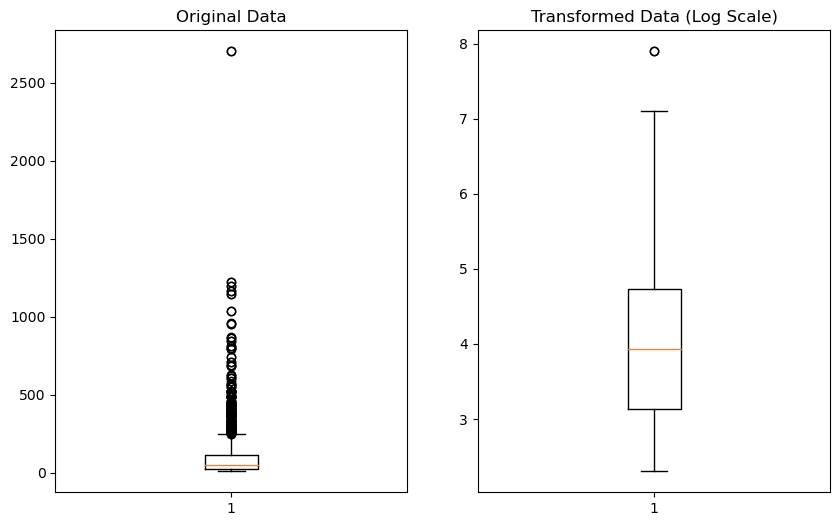

In [17]:
"""Log transformation is particularly effective for right-skewed data, as it compresses larger values more than smaller ones.
This helps to spread out the data and make the distribution more symmetric.
Log transformation is commonly used in health data analysis, especially for variables such as income, 
biomarker measurements, or other health-related indicators."""


# Example dataset with outliers
data = ardi_data_c['Data_Value_Alt']

# Apply log transformation
transformed_data = np.log(ardi_data_c['Data_Value_Alt'])

# Plot boxplots for original and transformed data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.boxplot(transformed_data)
plt.title('Transformed Data (Log Scale)')

plt.show()


## DATA EXPLORATION and Visualization

In [18]:
ardi_data_c.describe()

YearStart  YearEnd  Data_Value_Alt
count     2520.0   2520.0     2520.000000
mean      2015.0   2019.0      100.498810
std          0.0      0.0      155.664333
min       2015.0   2019.0       10.000000
25%       2015.0   2019.0       23.000000
50%       2015.0   2019.0       51.000000
75%       2015.0   2019.0      114.000000
max       2015.0   2019.0     2701.000000

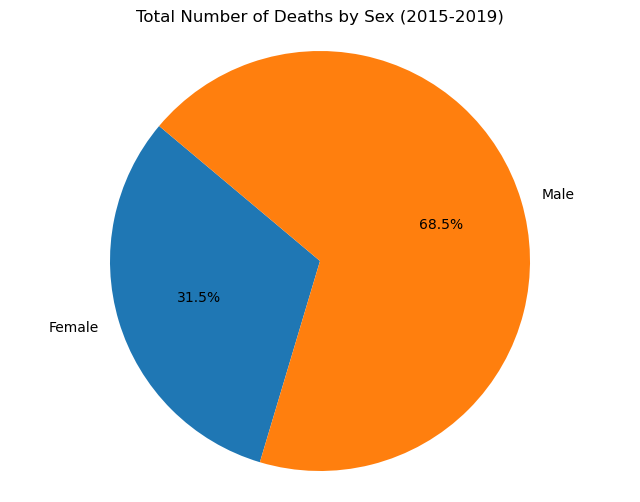

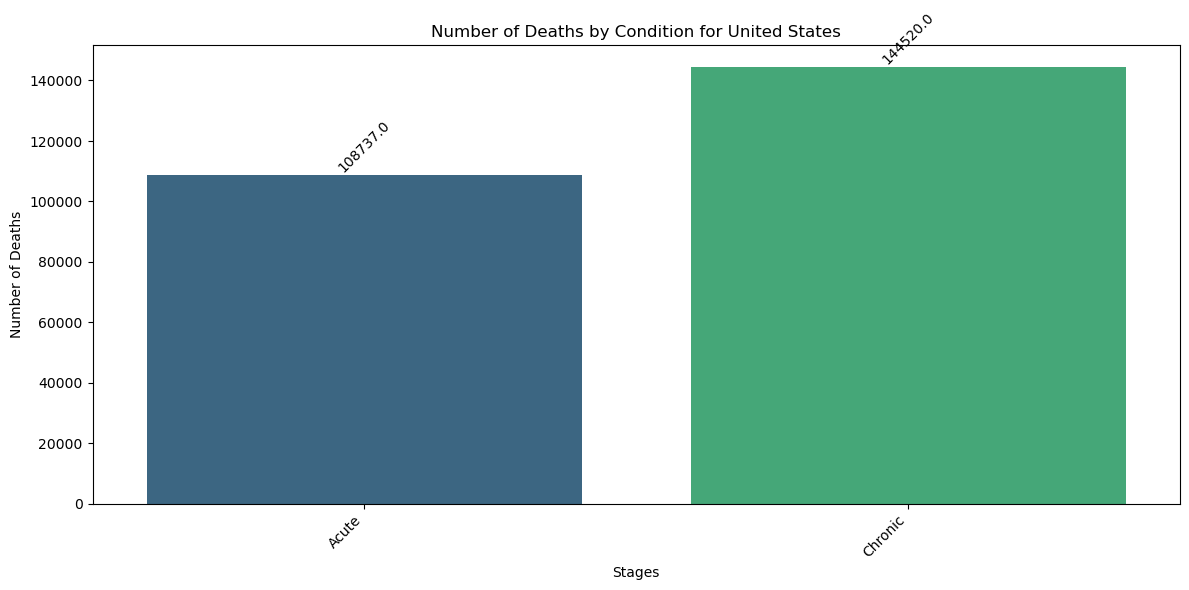

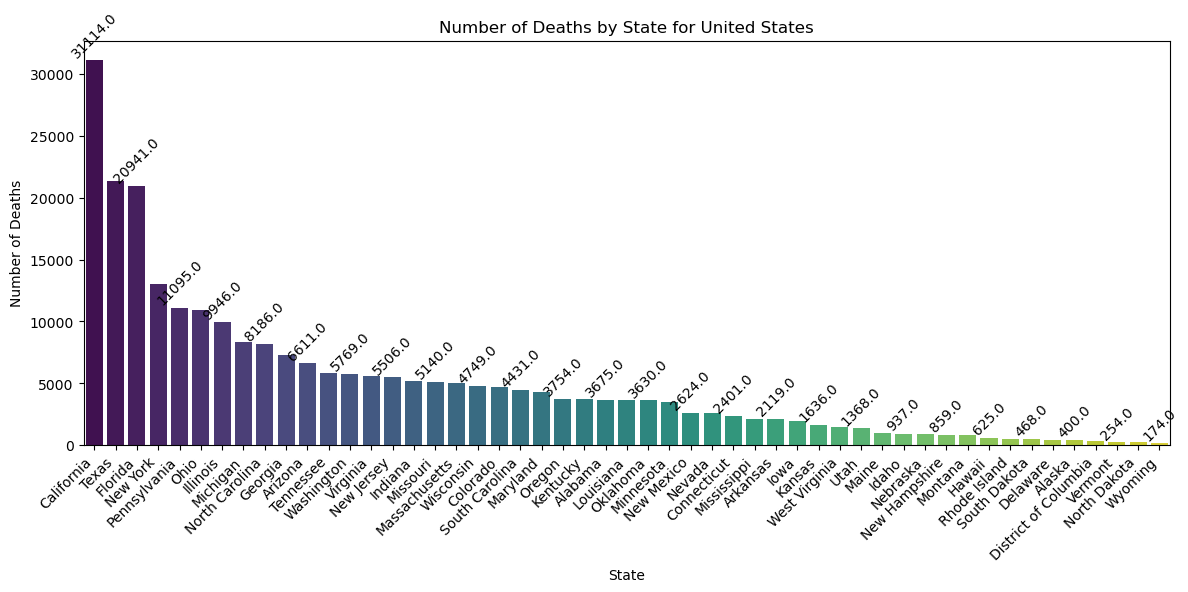

In [19]:
# Group the data by 'Sex' and calculate the total number of deaths
total_deaths_by_sex = ardi_data_c.groupby('Sex')['Data_Value_Alt'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_deaths_by_sex, labels=total_deaths_by_sex.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Deaths by Sex (2015-2019)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming ardi_data_c is your DataFrame and already imported

# Grouping and summing data
total_deaths_by_type = ardi_data_c.groupby('ConditionType')['Data_Value_Alt'].sum().reset_index()

plt.figure(figsize=(12, 6))
# Now you can directly use total_deaths_by_type as it's correctly formatted
ax = sns.barplot(x='ConditionType', y='Data_Value_Alt', data=total_deaths_by_type, palette='viridis')
plt.title('Number of Deaths by Condition for United States')
plt.xlabel('Stages')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Correcting the annotation loop
# Note: Adjust the "+ 10" in the y parameter if the annotations don't fit well visually
for i, (condition, total) in enumerate(zip(total_deaths_by_type['ConditionType'], total_deaths_by_type['Data_Value_Alt'])):
    plt.text(i, total + 10, str(round(total, 2)), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




# Filter out the row with state name 'United States'
data_filtered = ardi_data_c[ardi_data_c['LocationDesc'] != 'United States']

# Group data by state and sum the number of deaths
deaths_by_state = data_filtered.groupby('LocationDesc')['Data_Value_Alt'].sum().reset_index()

# Sorting the data by the number of deaths
deaths_by_state = deaths_by_state.sort_values(by='Data_Value_Alt', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='LocationDesc', y='Data_Value_Alt', data=deaths_by_state, palette='viridis')
plt.title('Number of Deaths by State for United States')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add annotation in interval of 2 bins
for i in range(0, len(deaths_by_state), 2):
    plt.text(i, deaths_by_state.iloc[i]['Data_Value_Alt'] + 10, str(deaths_by_state.iloc[i]['Data_Value_Alt']), ha='center', va='bottom', rotation=45)

plt.tight_layout()
plt.show()




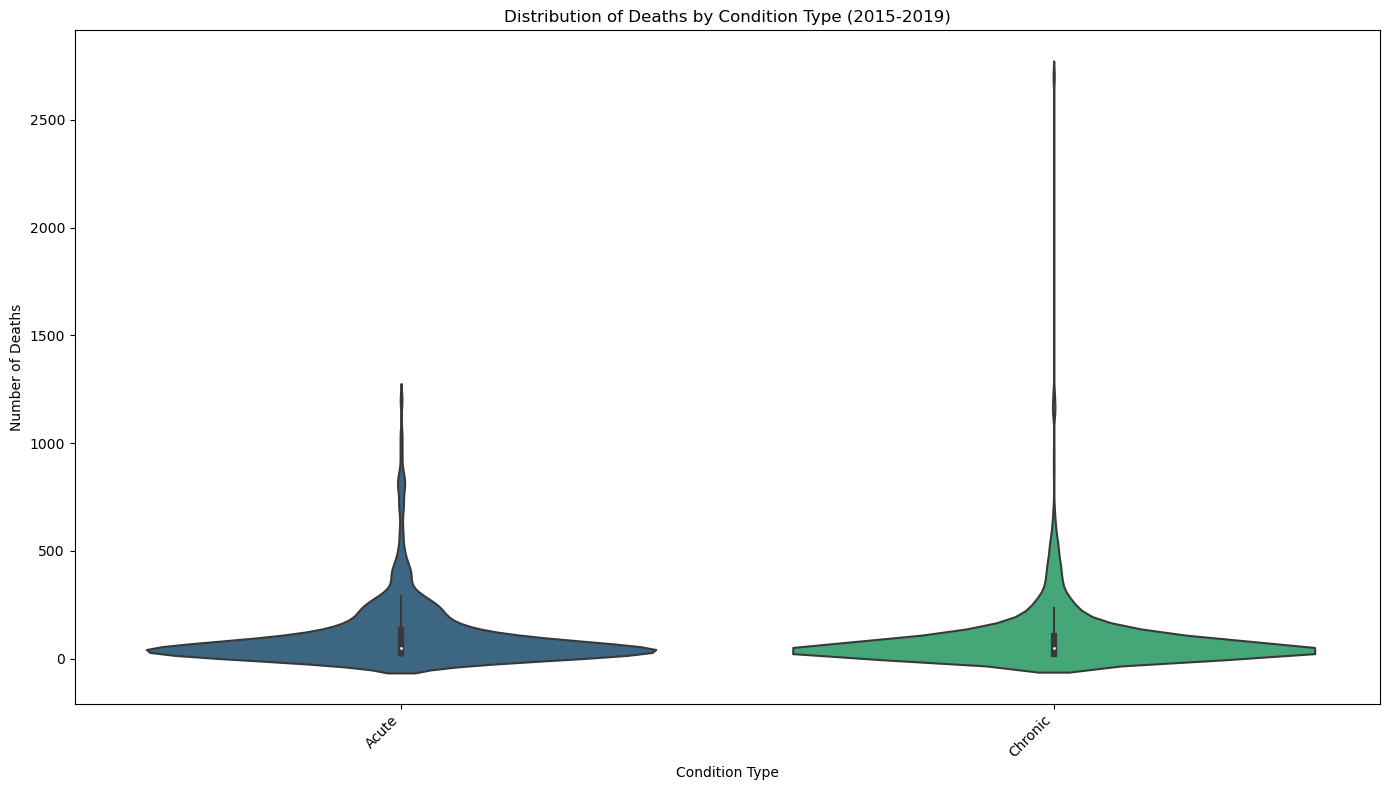

In [20]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming your DataFrame is named df

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'ConditionType' column to encode it
# ardi_data_c['ConditionType_Encoded'] = label_encoder.fit_transform(ardi_data_c['ConditionType'])

# # Now 'ConditionType_Encoded' is your NumAttribute
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=ardi_data_c, x='ConditionType_Encoded', y='Data_Value_Alt', hue='ConditionType', palette='viridis')

# plt.title('Data_Value_Alt vs. Encoded ConditionType')
# plt.xlabel('Encoded ConditionType')
# plt.ylabel('Data_Value_Alt')

# # Displaying the legend outside the plot
# plt.legend(title='Condition Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.tight_layout()
# plt.show()



plt.figure(figsize=(14, 8))
sns.violinplot(x='ConditionType', y='Data_Value_Alt', data=ardi_data_c, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Deaths by Condition Type (2015-2019)')
plt.xlabel('Condition Type')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()


In [21]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named df and contains relevant columns like LocationDesc and Data_Value_Alt

# # Select relevant features
# X = ardi_data_c[['LocationDesc', 'Data_Value_Alt']]

# # Feature scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.drop(columns=['LocationDesc']))

# # Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)
# df['Cluster'] = kmeans.fit_predict(X_scaled)

# # Visualization
# # Load US map data
# us_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# # Merge cluster labels with US map data
# us_map = us_map.merge(ardi_data_c[['LocationDesc', 'Cluster']], how='left', left_on='name', right_on='LocationDesc')

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# us_map.plot(column='Cluster', categorical=True, legend=True, ax=ax, cmap='viridis', edgecolor='black')
# plt.title('Clusters of States with Similar Alcohol-Related Death Rates')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


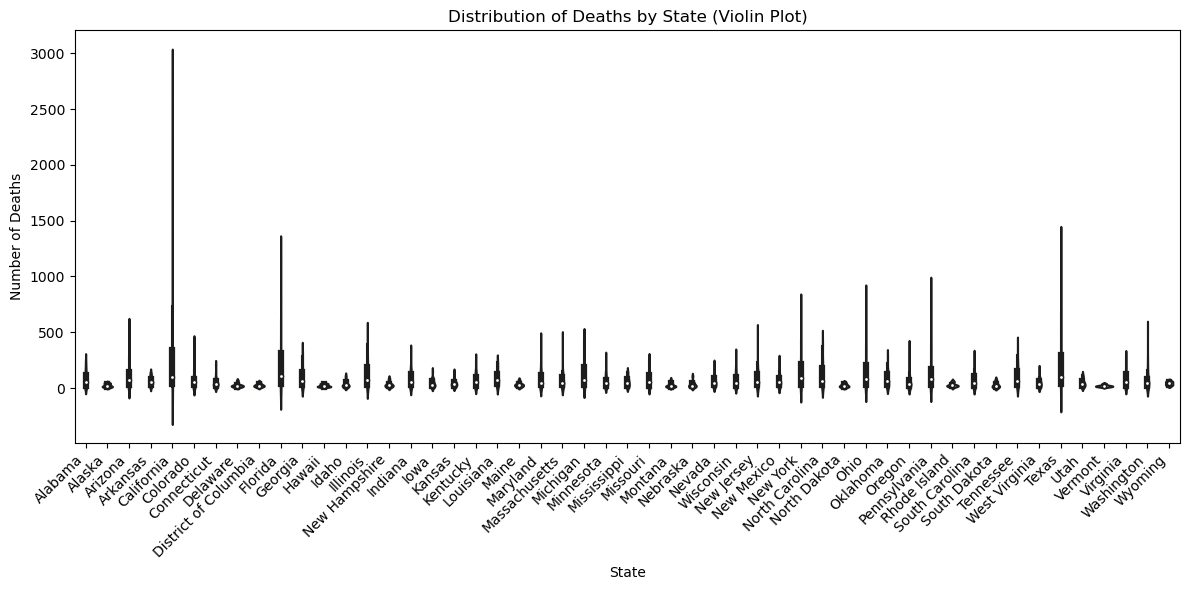

In [22]:
# or
# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='LocationDesc', y='Data_Value_Alt', data=data_filtered, palette='viridis')
plt.title('Distribution of Deaths by State (Violin Plot)')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

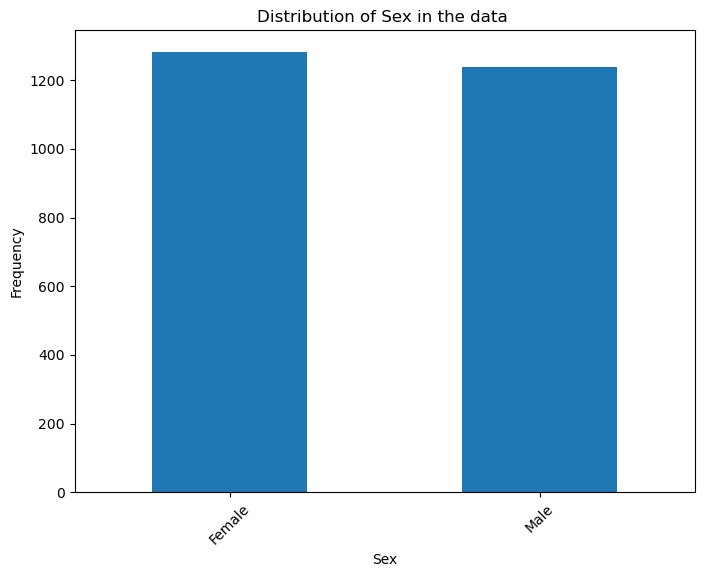

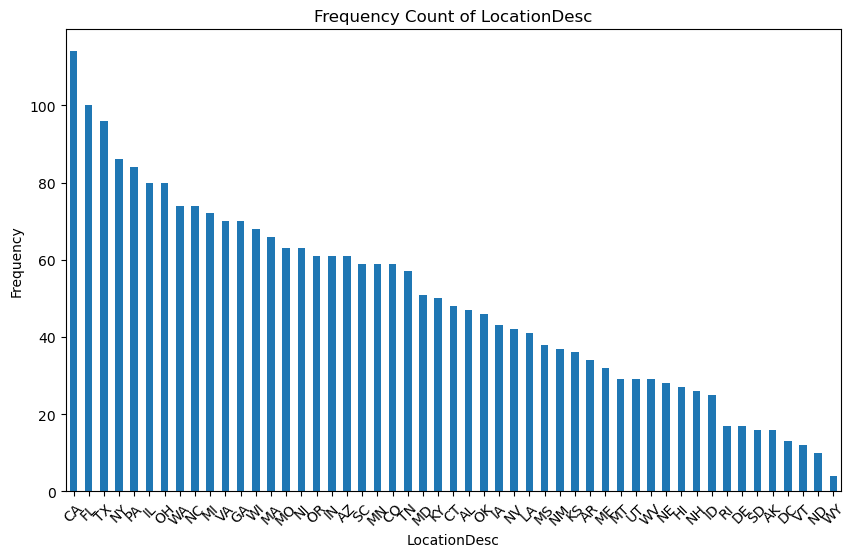

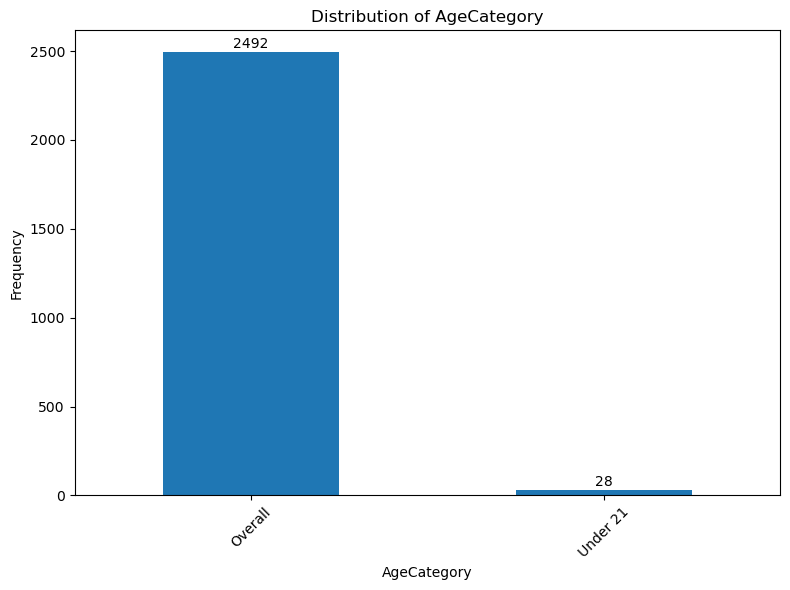

In [23]:
# Calculate mode separately
mode_values = ardi_data_c.mode()
# print(mode_values)

# Frequency count of 'AgeCategory' categorical variable (bar chart) with annotation
plt.figure(figsize=(8, 6))
counts = ardi_data_c['Sex'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution of Sex in the data ')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


# Bar Chart for Frequency Count of 'LocationDesc'
plt.figure(figsize=(10, 6))
ardi_data_c['LocationAbbr'].value_counts().plot(kind='bar')
plt.title('Frequency Count of LocationDesc')
plt.xlabel('LocationDesc')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Frequency count of 'AgeCategory' categorical variable (bar chart) with annotation
plt.figure(figsize=(8, 6))
counts = ardi_data_c['AgeGroup'].value_counts()
counts.plot(kind='bar')
plt.title('Distribution of AgeCategory')
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add annotation
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


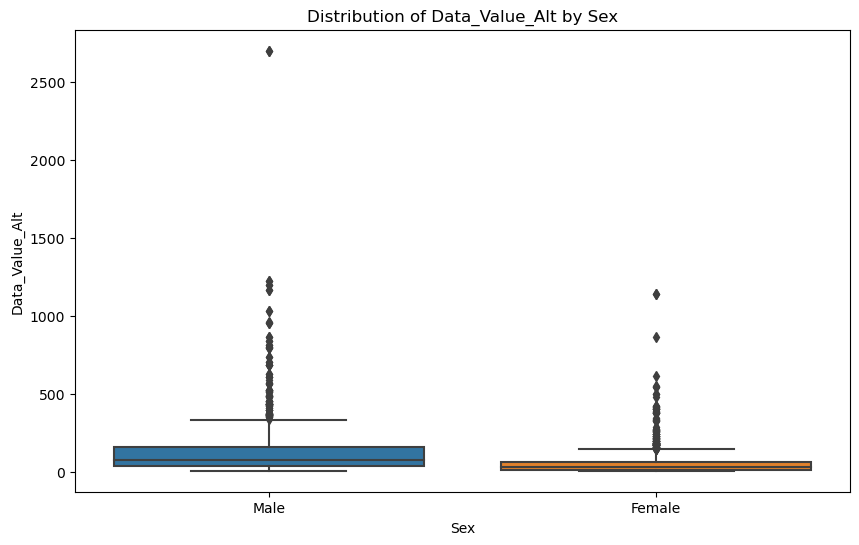

In [24]:
import seaborn as sns

# Box Plot for 'Data_Value_Alt' grouped by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Data_Value_Alt', data=ardi_data_c)
plt.title('Distribution of Data_Value_Alt by Sex')
plt.xlabel('Sex')
plt.ylabel('Data_Value_Alt')
plt.show()


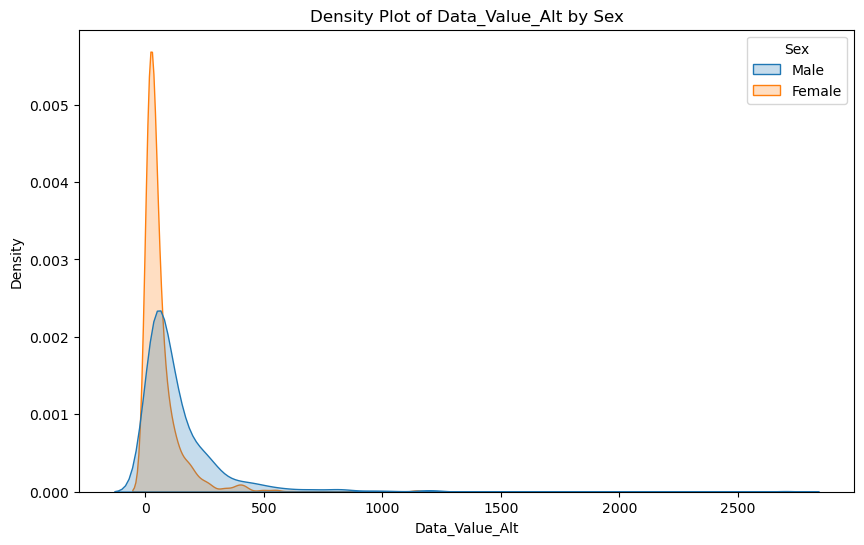

In [25]:
# Density Plot for 'Data_Value_Alt' grouped by 'Sex'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ardi_data_c, x='Data_Value_Alt', hue='Sex', fill=True)
plt.title('Density Plot of Data_Value_Alt by Sex')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Density')
plt.show()


## univarate analysis

In [26]:
ardi_data_c

YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1247        2015     2019           AL      Alabama       ARDI         Acute   
1250        2015     2019           AL      Alabama       ARDI         Acute   
1256        2015     2019           AL      Alabama       ARDI         Acute   
1261        2015     2019           AL      Alabama       ARDI         Acute   
1325        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
61171       2015     2019           WI    Wisconsin       ARDI       Chronic   
61584       2015     2019           WY      Wyoming       ARDI       Chronic   
61586       2015     2019           WY      Wyoming       ARDI       Chronic   
62155       2015     2019           WY      Wyoming       ARDI       Chronic   
62157       2015     2019           WY      Wyoming       ARDI       Chronic   

                               Category                 Cause_of_Death  \
1247         Alcohol-Related Poisonings        Poisoning (not alcohol)   
1250         Alcohol-Related Poisonings        Poisoning (not alcohol)   
1256      Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1261      Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1325                 Other Acute Causes                  Fire injuries   
...                                 ...                            ...   
61171  Liver, Gallbladder, and Pancreas   Liver cirrhosis, unspecified   
61584         100% Alcohol-Attributable        Alcoholic liver disease   
61586         100% Alcohol-Attributable        Alcoholic liver disease   
62155         100% Alcohol-Attributable        Alcoholic liver disease   
62157         100% Alcohol-Attributable        Alcoholic liver disease   

       Data_Value_Alt           Effect     ConsumptionPattern     Sex AgeGroup  
1247            134.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
1250             82.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
1256            247.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
1261             72.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
1325             13.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
...               ...              ...                    ...     ...      ...  
61171            79.0  Harmful Effects        Any Alcohol Use    Male  Overall  
61584            30.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
61586            57.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
62155            30.0  Harmful Effects        Any Alcohol Use  Female  Overall  
62157            57.0  Harmful Effects        Any Alcohol Use    Male  Overall  

[2520 rows x 13 columns]

count    2520.000000
mean      100.498810
std       155.664333
min        10.000000
25%        23.000000
50%        51.000000
75%       114.000000
max      2701.000000
Name: Data_Value_Alt, dtype: float64


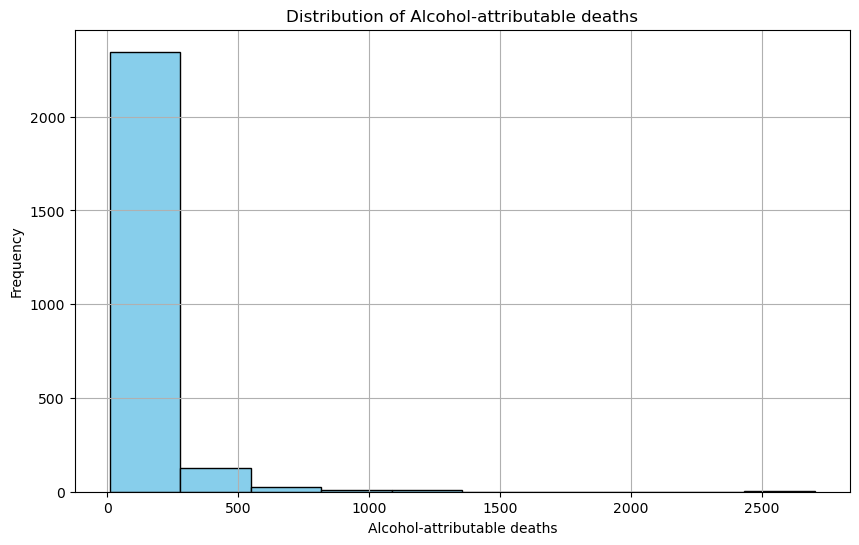

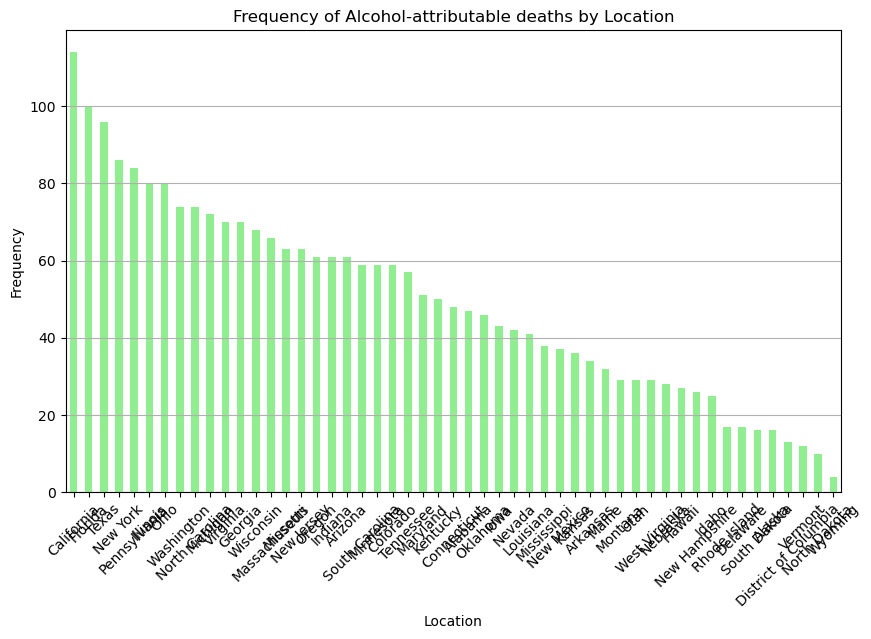

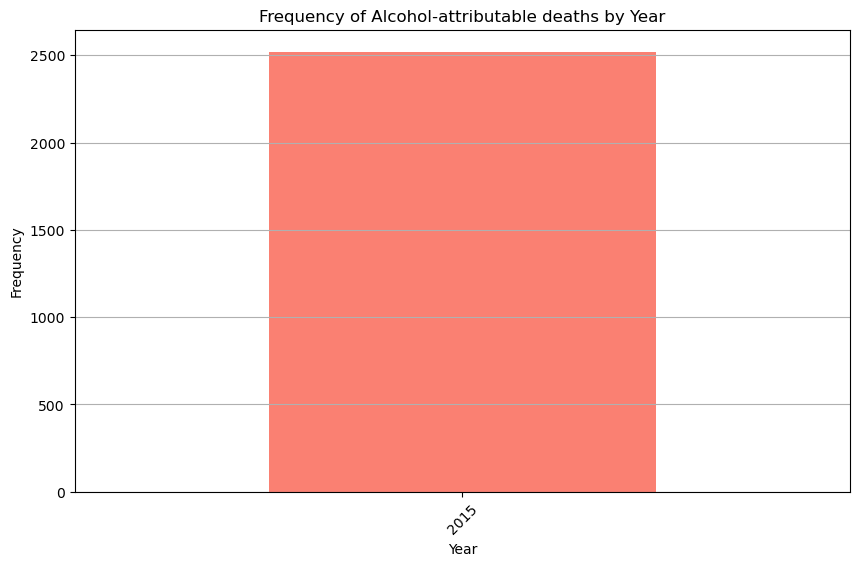

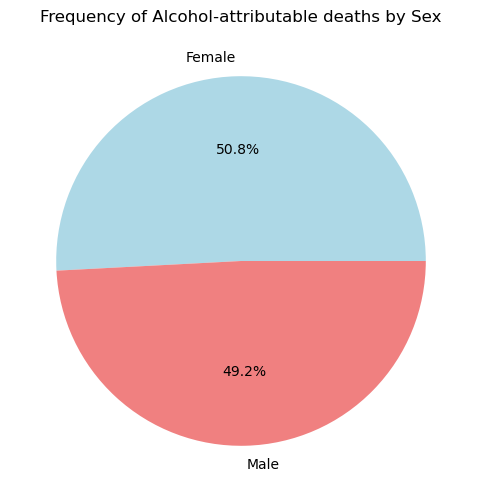

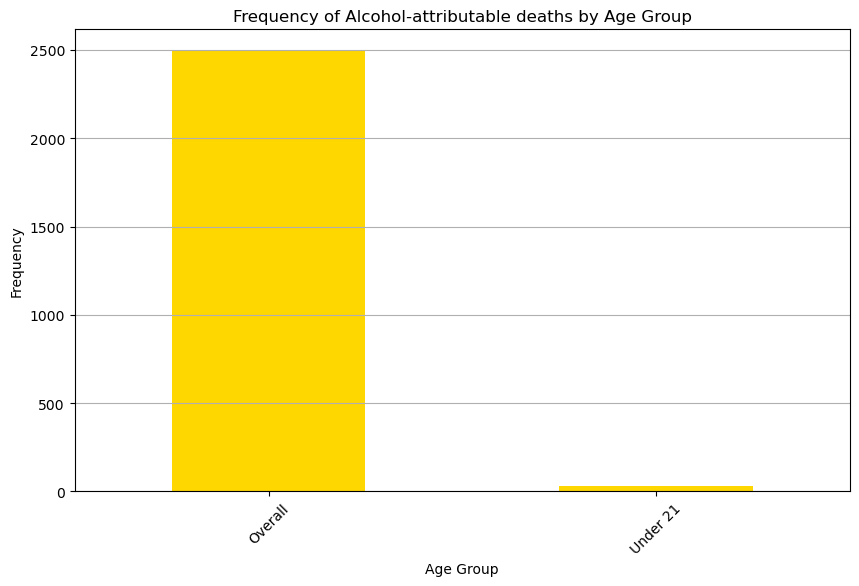

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics
summary_stats = ardi_data_c["Data_Value_Alt"].describe()
print(summary_stats)

# Distribution analysis
plt.figure(figsize=(10, 6))
plt.hist(ardi_data_c["Data_Value_Alt"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Alcohol-attributable deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol-attributable deaths')
plt.grid(True)
plt.show()

# Frequency analysis - by location
location_counts = ardi_data_c['LocationDesc'].value_counts()
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Location')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Frequency analysis - by year
year_counts = ardi_data_c['YearStart'].value_counts()
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar', color='salmon')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Frequency analysis - by sex
sex_counts = ardi_data_c['Sex'].value_counts()
plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Frequency of Alcohol-attributable deaths by Sex')
plt.ylabel('')
plt.show()

# Frequency analysis - by age group
age_counts = ardi_data_c['AgeGroup'].value_counts()
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='gold')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Alcohol-attributable deaths by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## bivaraite analysis

C:\Users\adedi\AppData\Local\Temp\ipykernel_3940\2601854974.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ardi_data_c.corr()


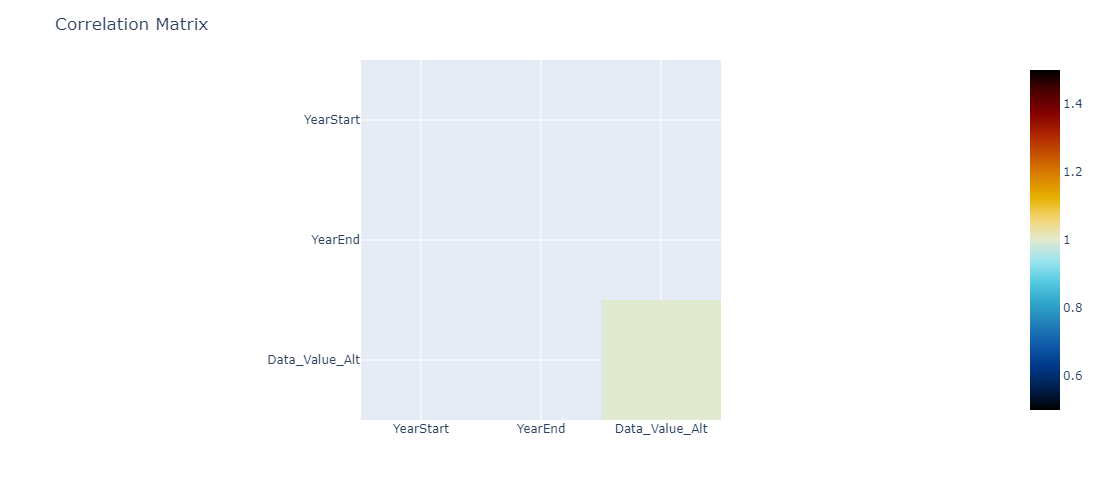

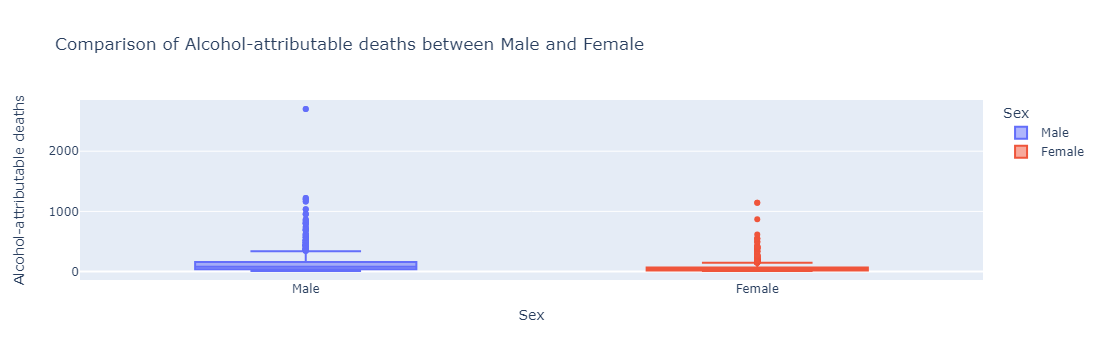

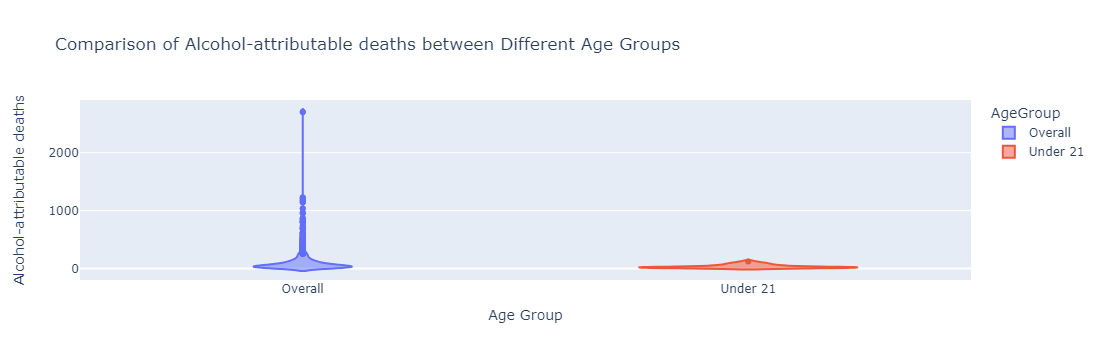

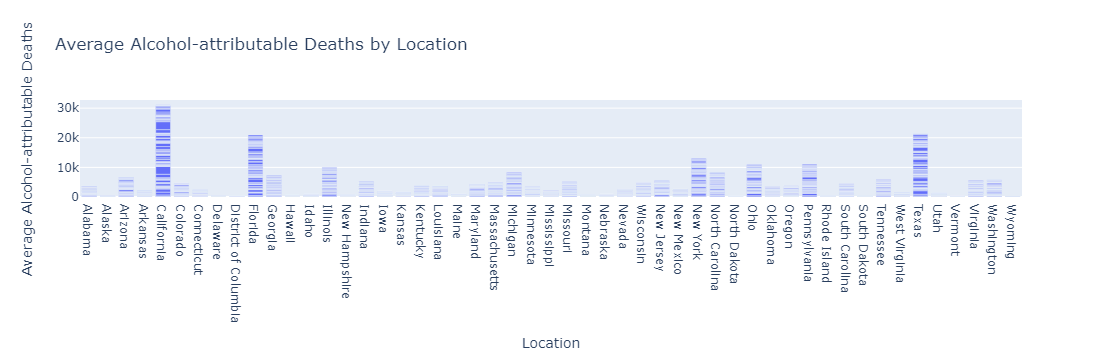

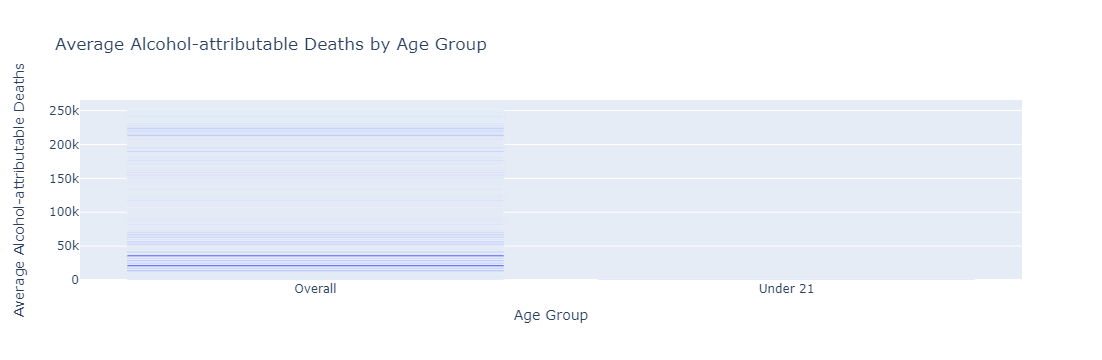

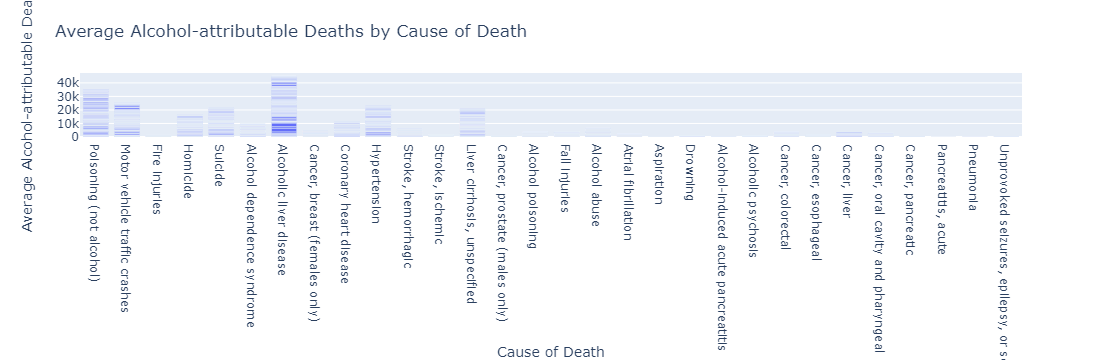

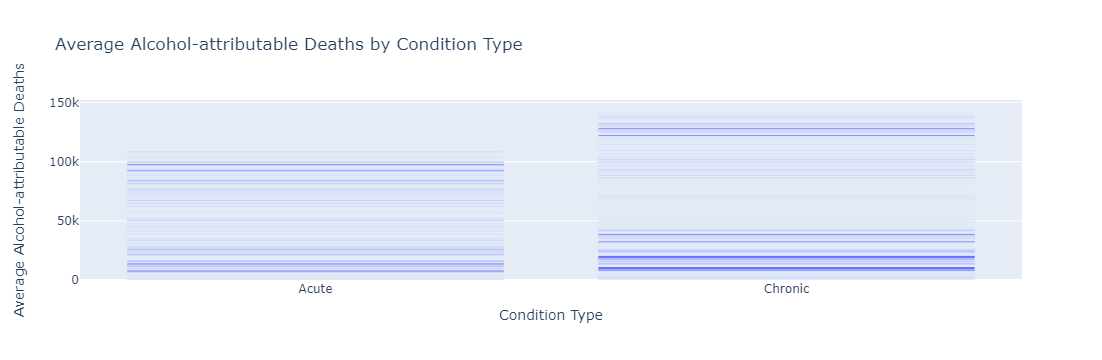

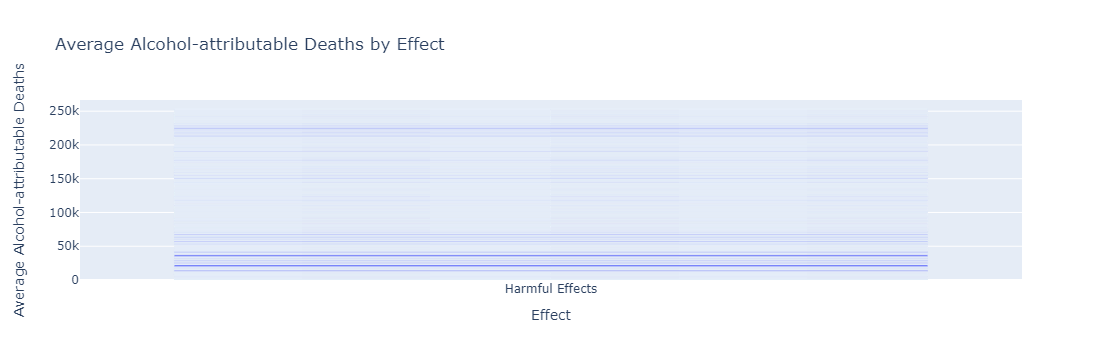

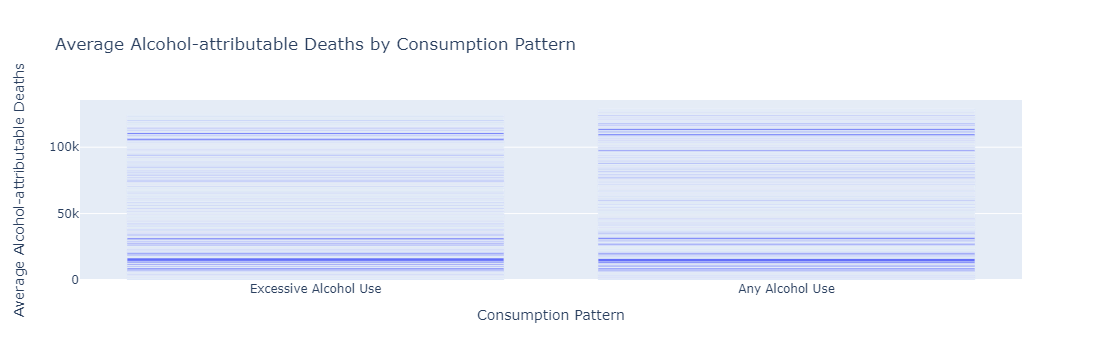

In [28]:
import plotly.express as px

# Correlation analysis
correlation_matrix = ardi_data_c.corr()

# Visualize correlation matrix
fig = px.imshow(correlation_matrix, color_continuous_scale='icefire')
fig.update_layout(title='Correlation Matrix', width=600, height=500)
fig.show()

# Comparison analysis - compare alcohol-attributable deaths between male and female
fig = px.box(ardi_data_c, x='Sex', y='Data_Value_Alt', color='Sex', title='Comparison of Alcohol-attributable deaths between Male and Female')
fig.update_xaxes(title='Sex')
fig.update_yaxes(title='Alcohol-attributable deaths')
fig.show()

# Comparison analysis - compare alcohol-attributable deaths between different age groups
fig = px.violin(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', color='AgeGroup', title='Comparison of Alcohol-attributable deaths between Different Age Groups')
fig.update_xaxes(title='Age Group')
fig.update_yaxes(title='Alcohol-attributable deaths')
fig.show()
import plotly.express as px

# Location vs. Alcohol-attributable Deaths
fig_location = px.bar(ardi_data_c, x='LocationDesc', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Location')
fig_location.update_xaxes(title='Location')
fig_location.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_location.show()

# Age Group vs. Alcohol-attributable Deaths
fig_age = px.bar(ardi_data_c, x='AgeGroup', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Age Group')
fig_age.update_xaxes(title='Age Group')
fig_age.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_age.show()

# Cause of Death vs. Alcohol-attributable Deaths
fig_cause = px.bar(ardi_data_c, x='Cause_of_Death', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Cause of Death')
fig_cause.update_xaxes(title='Cause of Death')
fig_cause.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_cause.show()

# Condition Type vs. Alcohol-attributable Deaths
fig_condition = px.bar(ardi_data_c, x='ConditionType', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Condition Type')
fig_condition.update_xaxes(title='Condition Type')
fig_condition.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_condition.show()

# Effect vs. Alcohol-attributable Deaths
fig_effect = px.bar(ardi_data_c, x='Effect', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Effect')
fig_effect.update_xaxes(title='Effect')
fig_effect.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_effect.show()

# Consumption Pattern vs. Alcohol-attributable Deaths
fig_consumption = px.bar(ardi_data_c, x='ConsumptionPattern', y='Data_Value_Alt', title='Average Alcohol-attributable Deaths by Consumption Pattern')
fig_consumption.update_xaxes(title='Consumption Pattern')
fig_consumption.update_yaxes(title='Average Alcohol-attributable Deaths')
fig_consumption.show()



## multi variate analysis

In [29]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Encode categorical columns
# categorical_cols = ['LocationDesc', 'DataSource', 'ConditionType', 'Category', 
#                     'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'AgeGroup_Cat']
# for col in categorical_cols:
#     ardi_data_c[col] = label_encoder.fit_transform(ardi_data_c[col])

# # Now, let's proceed with the Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Splitting the data into training and testing sets
# X = ardi_data_c.drop(columns=['Data_Value_Alt'])
# y = ardi_data_c['Data_Value_Alt']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initializing the Random Forest Regressor
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fitting the model
# rf_regressor.fit(X_train, y_train)

# # Making predictions
# y_pred_train = rf_regressor.predict(X_train)
# y_pred_test = rf_regressor.predict(X_test)

# # Evaluating the model
# train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
# test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# print("Train RMSE:", train_rmse)
# print("Test RMSE:", test_rmse)


In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the hyperparameters grid
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Create the Random Forest Regressor
# rf_regressor = RandomForestRegressor(random_state=42)

# # Perform Grid Search with Cross-Validation
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
#                            cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Print the best parameters
# print("Best Parameters:", best_params)

# # Use the best estimator to make predictions
# y_train_pred = best_estimator.predict(X_train)
# y_test_pred = best_estimator.predict(X_test)

# # Calculate RMSE
# train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
# test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# print("Train RMSE:", train_rmse)
# print("Test RMSE:", test_rmse)


In [31]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# import xgboost as xgb

# # Define the hyperparameters grid for XGBoost
# xgb_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [3, 6],
#     'learning_rate': [0.1, 0.01]
# }

# # Create the XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(random_state=42)

# # Perform Grid Search with Cross-Validation for XGBoost
# xgb_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=xgb_param_grid, 
#                                cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data for XGBoost
# xgb_grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator for XGBoost
# best_xgb_params = xgb_grid_search.best_params_
# best_xgb_estimator = xgb_grid_search.best_estimator_

# # Print the best parameters for XGBoost
# print("Best Parameters for XGBoost:", best_xgb_params)

# # Use the best estimator to make predictions for XGBoost
# y_train_pred_xgb = best_xgb_estimator.predict(X_train)
# y_test_pred_xgb = best_xgb_estimator.predict(X_test)

# # Calculate RMSE for XGBoost
# train_rmse_xgb = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
# test_rmse_xgb = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

# print("Train RMSE for XGBoost:", train_rmse_xgb)
# print("Test RMSE for XGBoost:", test_rmse_xgb)


# # Define the hyperparameters grid for SVR
# svr_param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.1, 0.01, 0.001]
# }

# # Create the SVR regressor
# svr_regressor = SVR()

# # Perform Grid Search with Cross-Validation for SVR
# svr_grid_search = GridSearchCV(estimator=svr_regressor, param_grid=svr_param_grid, 
#                                cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)

# # Fit the grid search to the data for SVR
# svr_grid_search.fit(X_train, y_train)

# # Get the best parameters and best estimator for SVR
# best_svr_params = svr_grid_search.best_params_
# best_svr_estimator = svr_grid_search.best_estimator_

# # Print the best parameters for SVR
# print("Best Parameters for SVR:", best_svr_params)

# # Use the best estimator to make predictions for SVR
# y_train_pred_svr = best_svr_estimator.predict(X_train)
# y_test_pred_svr = best_svr_estimator.predict(X_test)

# # Calculate RMSE for SVR
# train_rmse_svr = mean_squared_error(y_train, y_train_pred_svr, squared=False)
# test_rmse_svr = mean_squared_error(y_test, y_test_pred_svr, squared=False)

# print("Train RMSE for SVR:", train_rmse_svr)
# print("Test RMSE for SVR:", test_rmse_svr)


In [32]:
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Scaling the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Building the Neural Network model
# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse')

# # Fit the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)

# # Predict and evaluate the model
# y_train_pred_nn = model.predict(X_train_scaled)
# y_test_pred_nn = model.predict(X_test_scaled)

# # Calculate RMSE
# train_rmse_nn = mean_squared_error(y_train, y_train_pred_nn, squared=False)
# test_rmse_nn = mean_squared_error(y_test, y_test_pred_nn, squared=False)

# print("Train RMSE for NN:", train_rmse_nn)
# print("Test RMSE for NN:", test_rmse_nn)


## PCA and feature selection

[4.40094678e-02 2.61523526e-02 2.43476821e-02 2.40410969e-02
 2.31905484e-02 2.25596126e-02 2.22257814e-02 2.16267038e-02
 2.08822101e-02 2.00924030e-02 1.67766490e-02 1.38113390e-02
 1.37067243e-02 1.24829287e-02 1.22889656e-02 1.21215920e-02
 1.19331157e-02 1.18814567e-02 1.16836486e-02 1.16256075e-02
 1.15138161e-02 1.12675266e-02 1.11837760e-02 1.10969475e-02
 1.10790483e-02 1.09824651e-02 1.08763052e-02 1.05435798e-02
 1.05279953e-02 1.05233098e-02 1.05202601e-02 1.04992099e-02
 1.04889788e-02 1.04804463e-02 1.04700075e-02 1.04606510e-02
 1.04494247e-02 1.04473936e-02 1.04414451e-02 1.04325575e-02
 1.04190278e-02 1.04005832e-02 1.03938099e-02 1.03907240e-02
 1.03734228e-02 1.03698108e-02 1.03550120e-02 1.03476572e-02
 1.03376979e-02 1.03250946e-02 1.03228766e-02 1.03158409e-02
 1.03135415e-02 1.02981021e-02 1.02830831e-02 1.02733862e-02
 1.02664072e-02 1.02571342e-02 1.02533305e-02 1.02248681e-02
 1.01762675e-02 1.01379629e-02 1.01096297e-02 1.00553448e-02
 9.96496114e-03 9.929056

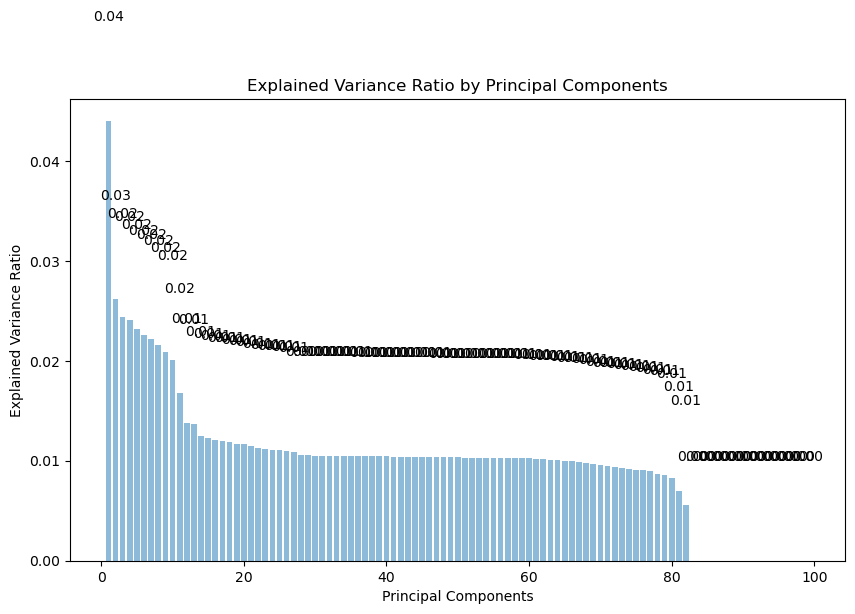

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for factor analysis
features = ['LocationDesc',  'ConditionType', 
            'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 
            'Sex', 'AgeGroup']

# Extract the features
X = ardi_data_c[features]

# Convert categorical variables to dummy variables (one-hot encoding)
X_encoded = pd.get_dummies(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')

# Add annotations
for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i + 1, ratio + 0.01, f'{ratio:.2f}', ha='center')

plt.show()


In [54]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming ardi_data_c is your original DataFrame
# Select the features for PCA
features = ['LocationDesc', 'ConditionType', 'Category', 'Cause_of_Death', 
            'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']

# Extract the features for PCA and perform one-hot encoding
X_encoded = pd.get_dummies(ardi_data_c[features])

# Standardize the features
X_scaled = StandardScaler().fit_transform(X_encoded)

# Perform PCA
pca = PCA().fit(X_scaled)

# Get the loadings for all principal components
loadings = pca.components_.T

# Create a DataFrame to store the loadings for the principal components
n_components = pca.n_components_  # The total number of principal components
column_names = [f'PC{i+1}' for i in range(n_components)]
loadings_df = pd.DataFrame(loadings, columns=column_names, index=X_encoded.columns)

# Function to match features to columns for each principal component
def match_columns_to_features(principal_component):
    # Get the loadings for the specified principal component (corrected for zero-index)
    loadings = loadings_df.iloc[:, principal_component - 1]  
    
    # Find the features with the highest absolute loading values
    features = loadings.abs().sort_values(ascending=False).index.tolist()
    
    # Return the matched columns from the original dataset
    matched_columns = [column for column in features if column in X_encoded.columns]
    
    return matched_columns

# Calculate the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each PC
print("Explained Variance by Principal Component:")
for i, variance in enumerate(explained_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Specify the principal component you want to analyze
principal_component = 1

# Match columns to features for the specified principal component
matched_columns = match_columns_to_features(principal_component)

# Print the matched columns
print(f"Columns connected to Principal Component {principal_component}:")
for column in matched_columns:
    print(f"- {column}")


Explained Variance by Principal Component:
PC1: 0.3081
PC2: 0.1549
PC3: 0.1434
PC4: 0.1422
PC5: 0.1269
PC6: 0.0819
PC7: 0.0427
PC8: 0.0000
Columns connected to Principal Component 1:
- Category
- Cause_of_Death
- ConditionType
- AgeGroup
- ConsumptionPattern
- LocationDesc
- Sex
- Effect


In [35]:
ardi_data_c

YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
1247        2015     2019           AL      Alabama       ARDI         Acute   
1250        2015     2019           AL      Alabama       ARDI         Acute   
1256        2015     2019           AL      Alabama       ARDI         Acute   
1261        2015     2019           AL      Alabama       ARDI         Acute   
1325        2015     2019           AL      Alabama       ARDI         Acute   
...          ...      ...          ...          ...        ...           ...   
61171       2015     2019           WI    Wisconsin       ARDI       Chronic   
61584       2015     2019           WY      Wyoming       ARDI       Chronic   
61586       2015     2019           WY      Wyoming       ARDI       Chronic   
62155       2015     2019           WY      Wyoming       ARDI       Chronic   
62157       2015     2019           WY      Wyoming       ARDI       Chronic   

                               Category                 Cause_of_Death  \
1247         Alcohol-Related Poisonings        Poisoning (not alcohol)   
1250         Alcohol-Related Poisonings        Poisoning (not alcohol)   
1256      Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1261      Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
1325                 Other Acute Causes                  Fire injuries   
...                                 ...                            ...   
61171  Liver, Gallbladder, and Pancreas   Liver cirrhosis, unspecified   
61584         100% Alcohol-Attributable        Alcoholic liver disease   
61586         100% Alcohol-Attributable        Alcoholic liver disease   
62155         100% Alcohol-Attributable        Alcoholic liver disease   
62157         100% Alcohol-Attributable        Alcoholic liver disease   

       Data_Value_Alt           Effect     ConsumptionPattern     Sex AgeGroup  
1247            134.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
1250             82.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
1256            247.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
1261             72.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
1325             13.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
...               ...              ...                    ...     ...      ...  
61171            79.0  Harmful Effects        Any Alcohol Use    Male  Overall  
61584            30.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
61586            57.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
62155            30.0  Harmful Effects        Any Alcohol Use  Female  Overall  
62157            57.0  Harmful Effects        Any Alcohol Use    Male  Overall  

[2520 rows x 13 columns]

## clustering and data processing for machince learning

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
cluster_data= ardi_data_c[['LocationDesc', 'Data_Value_Alt']].copy()  # not to affect original DataFrame

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Export clustered data to CSV
cluster_data.to_csv('clustered_data.csv', index=False)


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant features
cluster_data = ardi_data_c[['LocationDesc', 'Data_Value_Alt']].copy()  # not to affect original DataFrame

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Calculate range of death values for each cluster
cluster_ranges = cluster_data.groupby('Cluster')['Data_Value_Alt'].agg(['min', 'max'])

# Print the range for each cluster
print("Range of Death Values for Each Cluster:")
print(cluster_ranges)


Range of Death Values for Each Cluster:
            min     max
Cluster                
0         113.0   297.0
1          10.0   112.0
2        2701.0  2701.0
3         685.0  1224.0
4         306.0   627.0


In [38]:
cluster_data

LocationDesc  Data_Value_Alt  Cluster
1247       Alabama           134.0        0
1250       Alabama            82.0        1
1256       Alabama           247.0        0
1261       Alabama            72.0        1
1325       Alabama            13.0        1
...            ...             ...      ...
61171    Wisconsin            79.0        1
61584      Wyoming            30.0        1
61586      Wyoming            57.0        1
62155      Wyoming            30.0        1
62157      Wyoming            57.0        1

[2520 rows x 3 columns]

In [39]:
df = pd.read_csv("Cleaned_1_data.csv")
df
# unique_sex = df['AgeGroup'].unique()
# print(unique_sex)


YearStart  YearEnd LocationAbbr LocationDesc DataSource ConditionType  \
0          2015     2019           AL      Alabama       ARDI         Acute   
1          2015     2019           AL      Alabama       ARDI         Acute   
2          2015     2019           AL      Alabama       ARDI         Acute   
3          2015     2019           AL      Alabama       ARDI         Acute   
4          2015     2019           AL      Alabama       ARDI         Acute   
...         ...      ...          ...          ...        ...           ...   
2515       2015     2019           WI    Wisconsin       ARDI       Chronic   
2516       2015     2019           WY      Wyoming       ARDI       Chronic   
2517       2015     2019           WY      Wyoming       ARDI       Chronic   
2518       2015     2019           WY      Wyoming       ARDI       Chronic   
2519       2015     2019           WY      Wyoming       ARDI       Chronic   

                              Category                 Cause_of_Death  \
0           Alcohol-Related Poisonings        Poisoning (not alcohol)   
1           Alcohol-Related Poisonings        Poisoning (not alcohol)   
2        Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
3        Motor Vehicle Traffic Crashes  Motor vehicle traffic crashes   
4                   Other Acute Causes                  Fire injuries   
...                                ...                            ...   
2515  Liver, Gallbladder, and Pancreas   Liver cirrhosis, unspecified   
2516         100% Alcohol-Attributable        Alcoholic liver disease   
2517         100% Alcohol-Attributable        Alcoholic liver disease   
2518         100% Alcohol-Attributable        Alcoholic liver disease   
2519         100% Alcohol-Attributable        Alcoholic liver disease   

      Data_Value_Alt           Effect     ConsumptionPattern     Sex AgeGroup  
0              134.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
1               82.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
2              247.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
3               72.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
4               13.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
...              ...              ...                    ...     ...      ...  
2515            79.0  Harmful Effects        Any Alcohol Use    Male  Overall  
2516            30.0  Harmful Effects  Excessive Alcohol Use  Female  Overall  
2517            57.0  Harmful Effects  Excessive Alcohol Use    Male  Overall  
2518            30.0  Harmful Effects        Any Alcohol Use  Female  Overall  
2519            57.0  Harmful Effects        Any Alcohol Use    Male  Overall  

[2520 rows x 13 columns]

In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

ardi_data = pd.read_csv("Cleaned_1_data.csv")


# Selecting relevant features
cluster_data = ardi_data[['LocationDesc', 'Data_Value_Alt']].copy()  # not to affect original DataFrame

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(cluster_data[['Data_Value_Alt']])

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)  
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame using .loc
cluster_data.loc[:, 'Cluster'] = kmeans.labels_

# Merge with original data to get state names
merged_data = pd.merge(cluster_data, ardi_data[['LocationDesc', 'LocationAbbr']], on='LocationDesc')

# Calculate range of death values for each cluster
cluster_ranges = merged_data.groupby(['LocationAbbr', 'Cluster'])['Data_Value_Alt'].agg(['min', 'max'])

# Print the range for each cluster by state
print("Range of Death Values for Each Cluster by State:")
print(cluster_ranges)


Range of Death Values for Each Cluster by State:
                        min    max
LocationAbbr Cluster              
AK           1         10.0   46.0
AL           0        134.0  247.0
             1         11.0  109.0
AR           0        127.0  136.0
             1         12.0  106.0
...                     ...    ...
WI           0        122.0  296.0
             1         10.0  104.0
WV           0        162.0  162.0
             1         11.0   99.0
WY           1         30.0   57.0

[114 rows x 2 columns]


In [41]:
# cluster_ranges

In [42]:
import pandas as pd

# Assuming your original DataFrame is named df
# Replace 'Location Desc', 'Cluster', and 'Data Value Alt' with your actual column names
cluster_data = {
    'LocationDesc': cluster_data['LocationDesc'],
    'Data_Value_Alt': cluster_data['Data_Value_Alt'],
    'Cluster': cluster_data['Cluster']
}

# Create DataFrame from dictionary
cluster_df = pd.DataFrame(cluster_data)

# Group by 'LocationDesc' and 'Cluster', calculate average 'Data_Value_Alt'
cluster_avg = cluster_df.groupby(['LocationDesc', 'Cluster'])['Data_Value_Alt'].mean().reset_index()

# # Group by 'LocationDesc' and calculate overall average 'Data_Value_Alt'
# state_avg = cluster_avg.groupby('LocationDesc')['Data_Value_Alt'].mean().reset_index()

# # Merge state_avg into cluster_df
# cluster_df = pd.merge(cluster_df, state_avg, on='LocationDesc', how='left', suffixes=('_cluster', '_state_avg'))

# # Display the new DataFrame
# print(cluster_df)


In [43]:
cluster_df.to_csv("Cluster_2.csv")

In [44]:
cluster_avg.head(10)

LocationDesc  Cluster  Data_Value_Alt
0      Alabama        0      176.666667
1      Alabama        1       44.428571
2       Alaska        1       25.000000
3      Arizona        0      188.900000
4      Arizona        1       45.615385
5      Arizona        4      527.000000
6     Arkansas        0      131.500000
7     Arkansas        1       53.100000
8   California        0      182.913043
9   California        1       44.661017

LocationAbbr: 0.2595
LocationDesc: 0.2585
Cause_of_Death: 0.2368
Category: 0.1002
Sex: 0.0651
ConditionType: 0.0309
ConsumptionPattern: 0.0259
AgeGroup: 0.0230
YearStart: 0.0000
YearEnd: 0.0000
DataSource: 0.0000
Effect: 0.0000


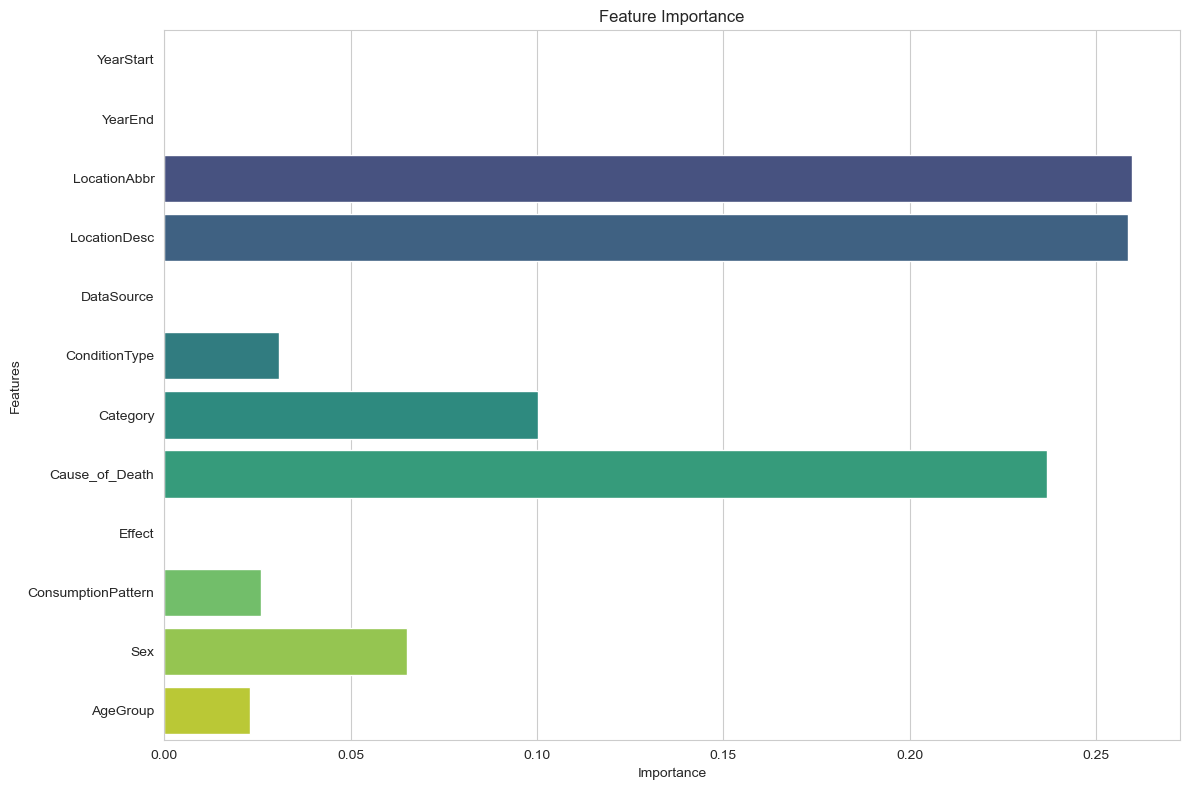

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'ardi_data_c' is a predefined DataFrame with appropriate columns

# Now proceed with encoding the categorical columns
categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']

label_encoders = {}  # To store the label encoders for each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
    label_encoders[col] = le

# Assuming 'Data_Value_Alt' is the target variable and already numeric
X = ardi_data_c.drop(['Data_Value_Alt'], axis=1)  # Exclude target variable
y = ardi_data_c['Data_Value_Alt']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor for Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Print each feature with its corresponding importance
feature_importance_dict = dict(zip(features, importances))
for feature, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [28]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd


# # Now proceed with encoding the categorical columns
# categorical_columns = ['LocationAbbr', 'LocationDesc', 'DataSource', 'ConditionType', 'Category', 'Cause_of_Death', 'Effect', 'ConsumptionPattern', 'Sex', 'AgeGroup']  # Adjusted list of categorical columns

# label_encoders = {}  # To store the label encoders for each categorical column
# for col in categorical_columns:
#     le = LabelEncoder()
#     ardi_data_c[col] = le.fit_transform(ardi_data_c[col].astype(str))
#     label_encoders[col] = le


# # Removing non-numeric columns for simplici
# # Assuming Data_Value is object due to potential non-numeric values, thus not included
# X = ardi_data_c.drop(['Data_Value_Alt'], axis=1)  # Exclude target variable and non-encoded Data_Value
# y = ardi_data_c['Data_Value_Alt']

# ### Splitting Data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ### RandomForestRegressor for Feature Importance
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# importances = rf_model.feature_importances_
# features = X.columns

# # Plotting Feature Importances
# plt.figure(figsize=(12, 8))
# sns.barplot(x=importances, y=features)
# plt.title('Feature Importance')
# plt.tight_layout()
# plt.show()


In [46]:
ardi_data_c.to_csv("encoded_data.csv")

In [47]:
importances
#  Sex
# - Effect
# - Cause_of_Death
# - LocationDesc
# - AgeGroup
# - ConsumptionPattern
# - ConditionType
# - Category

array([0.        , 0.        , 0.24591351, 0.25351267, 0.        ,
       0.03479072, 0.07232914, 0.27233453, 0.        , 0.02348432,
       0.0651257 , 0.03250941])

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Datasource' and 'Effect' columns
ardi_data_c_numeric = ardi_data_c.drop(columns=['DataSource', 'Effect'])

# Calculate correlation matrix
corr_matrix = ardi_data_c_numeric.corr()
corr_matrix
# # Plot heatmap of correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# plt.show()


YearStart  YearEnd  LocationAbbr  LocationDesc  \
YearStart                 NaN      NaN           NaN           NaN   
YearEnd                   NaN      NaN           NaN           NaN   
LocationAbbr              NaN      NaN      1.000000      0.994302   
LocationDesc              NaN      NaN      0.994302      1.000000   
ConditionType             NaN      NaN      0.005780      0.006821   
Category                  NaN      NaN     -0.007741     -0.007796   
Cause_of_Death            NaN      NaN     -0.015983     -0.017325   
Data_Value_Alt            NaN      NaN     -0.043409     -0.042935   
ConsumptionPattern        NaN      NaN     -0.001330     -0.001362   
Sex                       NaN      NaN     -0.002957     -0.003021   
AgeGroup                  NaN      NaN      0.008019      0.008081   

                    ConditionType  Category  Cause_of_Death  Data_Value_Alt  \
YearStart                     NaN       NaN             NaN             NaN   
YearEnd                       NaN       NaN             NaN             NaN   
LocationAbbr             0.005780 -0.007741       -0.015983       -0.043409   
LocationDesc             0.006821 -0.007796       -0.017325       -0.042935   
ConditionType            1.000000 -0.583902       -0.489787       -0.028078   
Category                -0.583902  1.000000        0.700072       -0.048090   
Cause_of_Death          -0.489787  0.700072        1.000000        0.072215   
Data_Value_Alt          -0.028078 -0.048090        0.072215        1.000000   
ConsumptionPattern      -0.025245  0.003740        0.019042        0.005348   
Sex                      0.004939 -0.002182       -0.036485       -0.003634   
AgeGroup                 0.227229 -0.112938       -0.107978        0.128223   

                    ConsumptionPattern       Sex  AgeGroup  
YearStart                          NaN       NaN       NaN  
YearEnd                            NaN       NaN       NaN  
LocationAbbr                 -0.001330 -0.002957  0.008019  
LocationDesc                 -0.001362 -0.003021  0.008081  
ConditionType                -0.025245  0.004939  0.227229  
Category                      0.003740 -0.002182 -0.112938  
Cause_of_Death                0.019042 -0.036485 -0.107978  
Data_Value_Alt                0.005348 -0.003634  0.128223  
ConsumptionPattern            1.000000 -0.002651 -0.002965  
Sex                          -0.002651  1.000000 -0.435341  
AgeGroup                     -0.002965 -0.435341  1.000000

In [49]:
# Neural network tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']].values
y = ardi_data_c['Data_Value_Alt'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Adjust epochs and batch size as needed

# Evaluate the model
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network Predicted values:", y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)






16/16 [==============================] - 0s 2ms/step
Neural Network Predicted values: [125.71281     49.327747    65.56571    111.3821     101.28521
  45.73753    135.62733     42.86613     32.349636    62.236664
  53.32477     43.74193     54.054207    -0.21741244 129.29428
  99.372894   119.34219    148.77164     92.54516     73.2585
  24.280956   201.29317    202.8117     115.698204   117.63433
  38.25004    103.59313    117.41056     48.957394    45.976818
 127.55187    206.12349    160.87633    137.6046      23.799463
  64.814735   134.58319    139.6443      88.36844     57.76398
  83.61733     90.21099    151.53133     65.24442     38.772293
 107.46154     77.75953    127.38851    141.59966     96.5606
  87.969025   133.02501    119.77888    115.35674     51.47614
 116.91163    152.60715     20.726307    61.749557    54.40382
  40.824497    32.562435    54.099773    27.891676   116.860275
  29.017265    45.840782   101.23942    118.22506    173.55978
 120.96201     54.054207 

In [50]:
# Random forest and GradientBoostingRegressor 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'ConditionType', 'AgeGroup','Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data_c[col] = le.fit_transform(ardi_data_c[col])
    label_encoders[col] = le

# Split data into features and target
X = ardi_data_c[['LocationAbbr','Sex', 'ConditionType','AgeGroup','Category','Cause_of_Death']]
y = ardi_data_c['Data_Value_Alt']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Evaluate Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

# Print results
print("Random Forest Results:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)
print("\nGradient Boosting Results:")
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Random Forest Results:
Mean Squared Error (MSE): 7384.599323246974
Mean Absolute Error (MAE): 38.31677064436885
R-squared (R2): 0.6678911828313498

Gradient Boosting Results:
Mean Squared Error (MSE): 10570.8077130525
Mean Absolute Error (MAE): 58.759685484524674
R-squared (R2): 0.524597301434157


In [51]:
# # Checking outliers

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Statistical Methods: Z-Score
# z_scores = np.abs((ardi_data_c['Data_Value_Alt'] - ardi_data_c['Data_Value_Alt'].mean()) / ardi_data_c['Data_Value_Alt'].std())
# outliers_zscore = ardi_data_c[z_scores > 3]  # Threshold of ±3 standard deviations from the mean
# print("Outliers detected using Z-Score method:")
# print(outliers_zscore)


# # Statistical Methods: Interquartile Range (IQR)
# Q1 = ardi_data_c['Data_Value_Alt'].quantile(0.25)
# Q3 = ardi_data_c['Data_Value_Alt'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers_iqr = ardi_data_c[(ardi_data_c['Data_Value_Alt']< lower_bound) | (ardi_data_c['Data_Value_Alt'] > upper_bound)]
# print("\nOutliers detected using IQR method:")
# print(outliers_iqr)


# # Machine Learning Methods: Isolation Forest
# isolation_forest = IsolationForest(contamination='auto')
# isolation_forest.fit(ardi_data_c[['Data_Value_Alt']])
# outliers_isolation_forest = ardi_data_c[isolation_forest.predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using Isolation Forest method:")
# print(outliers_isolation_forest)

# # Outlier Detection Algorithms: Local Outlier Factor (LOF)
# from sklearn.neighbors import LocalOutlierFactor
# lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
# outliers_lof = ardi_data_c[lof.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using LOF method:")
# print(outliers_lof)

# # Outlier Detection Algorithms: Robust Random Cut Forest (RRCF)
# rrcf = IsolationForest(contamination='auto')
# outliers_rrcf = ardi_data_c[rrcf.fit_predict(ardi_data_c[['Data_Value_Alt']]) == -1]
# print("\nOutliers detected using RRCF method:")
# print(outliers_rrcf)


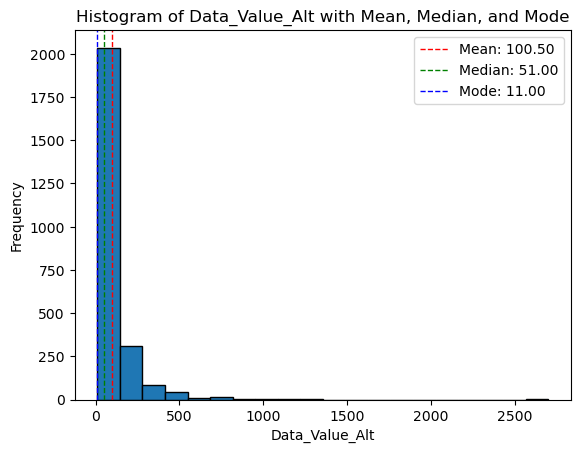

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of bins dynamically
bin_count = min(int(np.sqrt(len(ardi_data_c['Data_Value_Alt']))), 20)  # Adjust the maximum number of bins as needed

# Visual Inspection: Histogram
plt.hist(ardi_data_c['Data_Value_Alt'], bins=bin_count, edgecolor='k')

# Calculate mean, median, and mode
mean_val = np.mean(ardi_data_c['Data_Value_Alt'])
median_val = np.median(ardi_data_c['Data_Value_Alt'])
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Histogram of Data_Value_Alt with Mean, Median, and Mode')
plt.xlabel('Data_Value_Alt')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Show plot
plt.show()


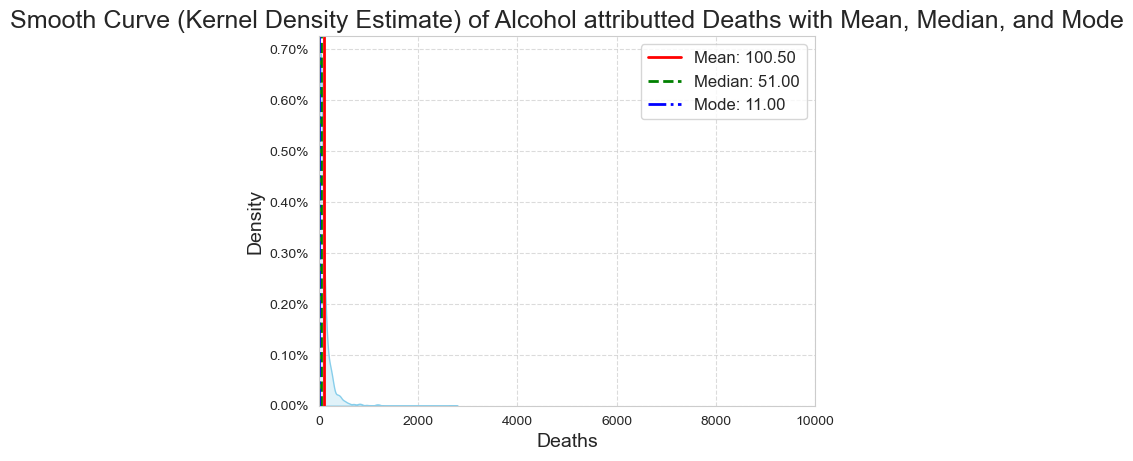

<Figure size 1000x600 with 0 Axes>

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set style
sns.set_style("whitegrid")

# Visual Inspection: Smooth Curve (Kernel Density Estimate)
sns.kdeplot(ardi_data_c['Data_Value_Alt'], color='skyblue', fill=True)

# Calculate mean, median, and mode
mean_val = ardi_data_c['Data_Value_Alt'].mean()
median_val = ardi_data_c['Data_Value_Alt'].median()
mode_val = ardi_data_c['Data_Value_Alt'].mode()[0]  # In case there are multiple modes, take the first one

# Add annotations for mean, median, and mode
plt.axvline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='blue', linestyle='-.', linewidth=2, label=f'Mode: {mode_val:.2f}')

# Set plot title and labels
plt.title('Smooth Curve (Kernel Density Estimate) of Alcohol attributted Deaths with Mean, Median, and Mode', fontsize=18)
plt.xlabel('Deaths', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# Set x-axis limits for zooming
plt.xlim(0, 10000)  # Adjust the limits as needed

# Show legend
plt.legend(fontsize=12, loc='upper right')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust figure size
plt.figure(figsize=(10, 6))

# Show plot
plt.show()
